<h4> KNN CLASIFICATION PROBLEM SOLVE </h4>
<h6> Author : Tanima Sinha</h6>

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
'''
Reading Data in pandas dataframe 
'''
col=['Age','YOT','NPA','Survival']
df=pd.read_csv('./haberman.data',sep=',',names=col)
df.head()

,Age,YOT,NPA,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


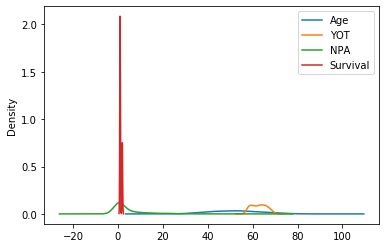

In [7]:
# ax = df['NPA'].plot.kde()
# ax.set_ylabel("NPA Density")


# bx = df['YOT'].plot.kde()
# bx.set_ylabel("YOT Density")


# cx = df['Age'].plot.kde()
# cx.set_ylabel("Age Density")


# cx = df['Survival'].plot.kde()
# cx.set_ylabel("Survival Density")

ax = df.plot.kde()


(array([ 5.,  0.,  9.,  2.,  8., 10.,  9., 10., 20.,  7., 16., 11., 17.,
        12., 20., 11., 23.,  7., 11., 15.,  6., 16.,  8., 15.,  5.,  8.,
         4.,  8.,  4.,  4.,  1.,  2.,  1.,  0.,  0.,  1.]),
 array([30.        , 31.47222222, 32.94444444, 34.41666667, 35.88888889,
        37.36111111, 38.83333333, 40.30555556, 41.77777778, 43.25      ,
        44.72222222, 46.19444444, 47.66666667, 49.13888889, 50.61111111,
        52.08333333, 53.55555556, 55.02777778, 56.5       , 57.97222222,
        59.44444444, 60.91666667, 62.38888889, 63.86111111, 65.33333333,
        66.80555556, 68.27777778, 69.75      , 71.22222222, 72.69444444,
        74.16666667, 75.63888889, 77.11111111, 78.58333333, 80.05555556,
        81.52777778, 83.        ]),
 <a list of 36 Patch objects>)

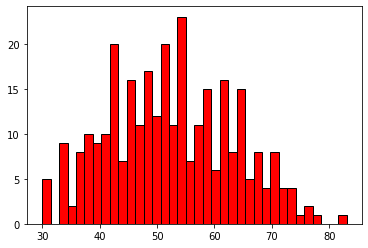

In [8]:
# matplotlib histogram
plt.hist(df['Age'], color = 'red', edgecolor = 'black',
         bins = int(180/5))

<h4>
Hence the above distrivution graph shows that except Survival all the others points are linearly distributed 
only the Survival data was ploted as catagorically , so the target variable is the Survival and others are indipendent variable 
</h4>


In [24]:
df.head(20)
# df =df.fillna(0)
df = df.replace(0, np.NaN)
# # df['Age']=df['Age'].fillna(df['Age'].mean())

# # df['YOT']=df['YOT'].fillna(df['YOT'].mean())

# # df['NPA']=df['NPA'].fillna(df['NPA'].mean())

'''
Preparing test set and traning set in 80% 20% ratio 
'''


df2=df.dropna(inplace=False)
df2.head(20)
from sklearn.model_selection import train_test_split

# #Seperate features and label
features = df2.iloc[:,0:3].values 
label = df2.iloc[:,[3]].values


# features
# # label

X_train,X_test,y_train,y_test=train_test_split(features, label,
test_size=0.20, random_state=1)




<h4> KNN CLASIFICATION PROCESS </h4>

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [11]:
pred = knn.predict(X_test)
print(pred)  # ---> Y^ 

[2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2]


In [12]:

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))  # EQ of RMSE y-Y^ 

              precision    recall  f1-score   support

           1       0.57      0.84      0.68        19
           2       0.50      0.20      0.29        15

    accuracy                           0.56        34
   macro avg       0.54      0.52      0.48        34
weighted avg       0.54      0.56      0.51        34



In [13]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
#print(cmat)
print('TN - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TN - True Negative 16
FP - False Positive 3
FN - False Negative 12
TP - True Positive 3
Accuracy Rate: 0.5588235294117647
Misclassification Rate: 0.4411764705882353


In [14]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
print(pred) 

[2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2]


<h4>Confusion Matrix</h4>

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))  # EQ of RMSE y-Y^ 


# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
#print(cmat)
print('TN - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

              precision    recall  f1-score   support

           1       0.54      0.79      0.64        19
           2       0.33      0.13      0.19        15

    accuracy                           0.50        34
   macro avg       0.43      0.46      0.41        34
weighted avg       0.45      0.50      0.44        34

TN - True Negative 15
FP - False Positive 4
FN - False Negative 13
TP - True Positive 2
Accuracy Rate: 0.5
Misclassification Rate: 0.5


<h4>Train test Score for SVC </h4>

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for randomState in range(1,20):
    X_train,X_test,y_train,y_test = train_test_split(features,label, test_size=0.2, random_state=randomState)
    

    clf.fit(X_train,y_train)
    
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    
    if test_score < train_score:
        print("Test Score FOR SVC : {} Training Score: {} Seed: {}".format(test_score,train_score,randomState))

Test Score FOR SVC : 0.5 Training Score: 0.9852941176470589 Seed: 1
Test Score FOR SVC : 0.6764705882352942 Training Score: 0.9705882352941176 Seed: 2
Test Score FOR SVC : 0.6176470588235294 Training Score: 0.9779411764705882 Seed: 3
Test Score FOR SVC : 0.5294117647058824 Training Score: 0.9779411764705882 Seed: 4
Test Score FOR SVC : 0.6176470588235294 Training Score: 0.9779411764705882 Seed: 5
Test Score FOR SVC : 0.5882352941176471 Training Score: 0.9852941176470589 Seed: 6
Test Score FOR SVC : 0.5882352941176471 Training Score: 0.9632352941176471 Seed: 7
Test Score FOR SVC : 0.6764705882352942 Training Score: 0.9705882352941176 Seed: 8
Test Score FOR SVC : 0.7352941176470589 Training Score: 0.9558823529411765 Seed: 9
Test Score FOR SVC : 0.5588235294117647 Training Score: 0.9705882352941176 Seed: 10
Test Score FOR SVC : 0.7058823529411765 Training Score: 0.9926470588235294 Seed: 11
Test Score FOR SVC : 0.5 Training Score: 0.9558823529411765 Seed: 12
Test Score FOR SVC : 0.61764705

<h4>Train test Score for KNN </h4>

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for randomState in range(1,20):
    X_train,X_test,y_train,y_test = train_test_split(features,label, test_size=0.2, random_state=randomState)
    

    knn.fit(X_train,y_train)
    
    train_score = knn.score(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    
    if test_score < train_score:
        print("Test Score FOR KNN : {} Training Score: {} Seed: {}".format(test_score,train_score,randomState))

Test Score FOR KNN : 0.5588235294117647 Training Score: 0.8382352941176471 Seed: 1
Test Score FOR KNN : 0.6470588235294118 Training Score: 0.8088235294117647 Seed: 2
Test Score FOR KNN : 0.5882352941176471 Training Score: 0.7573529411764706 Seed: 3
Test Score FOR KNN : 0.5588235294117647 Training Score: 0.8235294117647058 Seed: 4
Test Score FOR KNN : 0.5882352941176471 Training Score: 0.8014705882352942 Seed: 5
Test Score FOR KNN : 0.7058823529411765 Training Score: 0.8161764705882353 Seed: 6
Test Score FOR KNN : 0.5882352941176471 Training Score: 0.8014705882352942 Seed: 7
Test Score FOR KNN : 0.7352941176470589 Training Score: 0.7941176470588235 Seed: 8
Test Score FOR KNN : 0.7058823529411765 Training Score: 0.7794117647058824 Seed: 9
Test Score FOR KNN : 0.5294117647058824 Training Score: 0.8161764705882353 Seed: 10
Test Score FOR KNN : 0.5882352941176471 Training Score: 0.7941176470588235 Seed: 12
Test Score FOR KNN : 0.6764705882352942 Training Score: 0.7941176470588235 Seed: 13
T